In [20]:
import pymongo
import numpy as np

#Connect to mongoDB and get data from collection
client = pymongo.MongoClient() 
db = client.TrainingDataDB 
expCollection = db['XYexp1']
novCollection = db['XYnov1']
expDocuments = expCollection.find({})
novDocuments = novCollection.find({})
numExpDocuments = expDocuments.count()
numNovDocuments = novDocuments.count()
print numExpDocuments, numNovDocuments

currentExpData = []
for document in expDocuments:
    dataArray = document['data']
    currentExpData.append(dataArray)  
#print currentExpData
#print '-----------------'
currentNovData = []
for document in novDocuments:
    dataArray = document['data']
    currentNovData.append(dataArray)  
#print currentNovData


#TODO
# Iterate over all samples for the maneuver


155 215


In [13]:
#TODO
#Get clarification from Nestor on his t-SNE implementation
# 1) Feature extraction
# 2) Dimensionality reduction
# 3) Clustering
# 4) Classification


In [23]:
from sklearn.manifold import TSNE

X = np.concatenate((currentExpData, currentNovData), axis=0)
num1 = np.ones((numExpDocuments -1 ,1), dtype=np.int)
num2 = 2 * np.ones((numNovDocuments - 1,1), dtype=np.int)
y = np.concatenate((num1,num2), axis=0)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(370L, 2L)

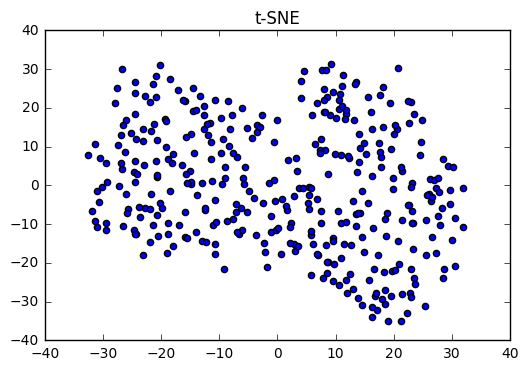

In [32]:
import matplotlib.pyplot as plt

plt.title('t-SNE')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()